# Mini Hackathon

## Import

In [15]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [16]:
df = pd.read_csv('data/fashion-mnist_train.csv')

## Exploratoy Data Analysis

In [17]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The dataset is composed of `784` pixels values and the `label` column. 

In [18]:
df['label'].value_counts()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: label, dtype: int64

Classes are perfectly balanced.

Below we collect in a list the labels for each class.

In [19]:
label_names =['T-shirt/top',
'Trouser',
'Pullover',
'Dress',
'Coat',
'Sandal',
'Shirt',
'Sneaker',
'Bag',
'Ankleboot']

To visualize the images we use the `imshow` function in matplotlib.

## Preprocessing

In [21]:
X = df.drop(columns = ["label"])
y = df["label"]
X.head()
X = X.to_numpy().astype("float32")/255
X = X.reshape(X.shape[0], 28, 28, 1)
y= utils.to_categorical(y, 10)

In [22]:
#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
#check dimension
X_test.shape, y_test.shape

((9000, 28, 28, 1), (9000, 10))

## NN

In [23]:
#mitchell's code
model = Sequential()
model.add(Conv2D(filters = 6,       #number of filters to use
              kernel_size = (3, 3),   #dimensions of the filters
              activation = 'relu',    #activation function
              input_shape = (28, 28, 1)))  #shape of image
 # dimensions of region of pooling
model.add(MaxPooling2D(pool_size = (2, 2)))   #filter dimensions
model.add(Conv2D(16, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten(input_shape = (28, 28, 1)))
model.add(Dense(128, activation = 'relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2)) # refers to nodes in the first hidden layer
model.add(Dense(32, activation = 'relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax', kernel_regularizer=l2(0.001)))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')

In [24]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    batch_size=256,  # 60000/256 = 235 weight updates per epoch
                    epochs=60,
                    verbose=1, 
                    callbacks=[early_stop])

Epoch 1/60
200/200 [==============================] - 4s 16ms/step - loss: 1.7067 - accuracy: 0.4594 - val_loss: 0.7314 - val_accuracy: 0.7760
Epoch 2/60
200/200 [==============================] - 3s 15ms/step - loss: 0.7880 - accuracy: 0.7612 - val_loss: 0.6273 - val_accuracy: 0.8108
Epoch 3/60
200/200 [==============================] - 3s 15ms/step - loss: 0.6855 - accuracy: 0.7954 - val_loss: 0.5726 - val_accuracy: 0.8281
Epoch 4/60
200/200 [==============================] - 3s 15ms/step - loss: 0.6334 - accuracy: 0.8108 - val_loss: 0.5604 - val_accuracy: 0.8317
Epoch 5/60
200/200 [==============================] - 3s 16ms/step - loss: 0.5950 - accuracy: 0.8263 - val_loss: 0.5241 - val_accuracy: 0.8436
Epoch 6/60
200/200 [==============================] - 3s 15ms/step - loss: 0.5615 - accuracy: 0.8371 - val_loss: 0.5186 - val_accuracy: 0.8444
Epoch 7/60
200/200 [==============================] - 3s 15ms/step - loss: 0.5405 - accuracy: 0.8458 - val_loss: 0.4886 - val_accuracy: 0.8587

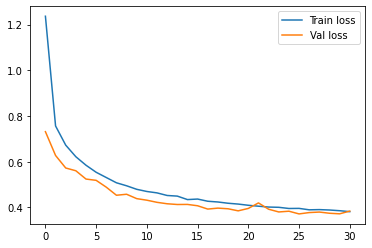

In [25]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend();

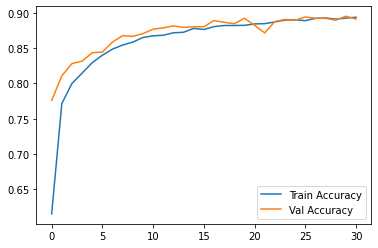

In [26]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend();

In [30]:
predictions = np.argmax(model.predict(X_test), axis=-1)
prediction = np.argmax(to_categorical(predictions), axis = 1)
prediction = encoder.inverse_transform(prediction)
correct = len([i for i, j in zip(prediction, z_test) if i == j])
perc_correct = round(len([i for i, j in zip(prediction, z_test) if i == j])*100/len(z_test), 2)
perc_correct

89.11

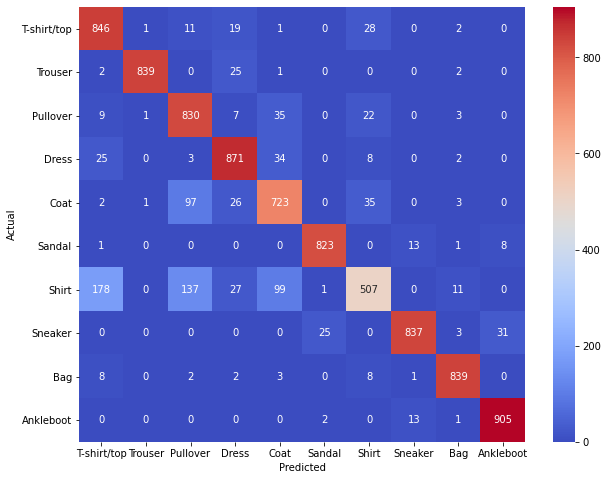

In [31]:
conf_mat = confusion_matrix(z_test, predictions)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap= 'coolwarm',
            xticklabels= label_names, yticklabels=label_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

We notice that `Shirt` is the lowest performance of all, and it gets confused with `Pullover`, `Coat`, `T-shirt/top`.

Also `Dress` seems to have the same confusion.

This is reasonable for our model.

## Analyze wrong prediction

In [32]:
wrong_index = []
dict = {'index':[],
        'pred':[], 
        'true':[] } 

wrong = pd.DataFrame(dict)
for i, (a, b) in enumerate(zip (predictions, z_test)):
    if a != b:
        wrong_index.append(i)
        new_row = {'index':i,'pred':a, 'true':b}
        wrong = wrong.append(new_row, ignore_index=True)

In [33]:
wrong.head()

,index,pred,true
0,7.0,3.0,6.0
1,21.0,8.0,4.0
2,30.0,3.0,1.0
3,41.0,2.0,6.0
4,60.0,4.0,3.0


In [35]:
wrong['pred'] = wrong['pred'].map({0 : 'T-shirt/top',
1: 'Trouser',
2: 'Pullover',
3: 'Dress',
4: 'Coat',
5: 'Sandal',
6: 'Shirt',
7: 'Sneaker',
8: 'Bag',
9: 'Ankleboot'})

In [36]:
wrong['true'] = wrong['true'].map({0 : 'T-shirt/top',
1: 'Trouser',
2: 'Pullover',
3: 'Dress',
4: 'Coat',
5: 'Sandal',
6: 'Shirt',
7: 'Sneaker',
8: 'Bag',
9: 'Ankleboot'})

In [37]:
Z_test.reset_index(drop=True, inplace= True)

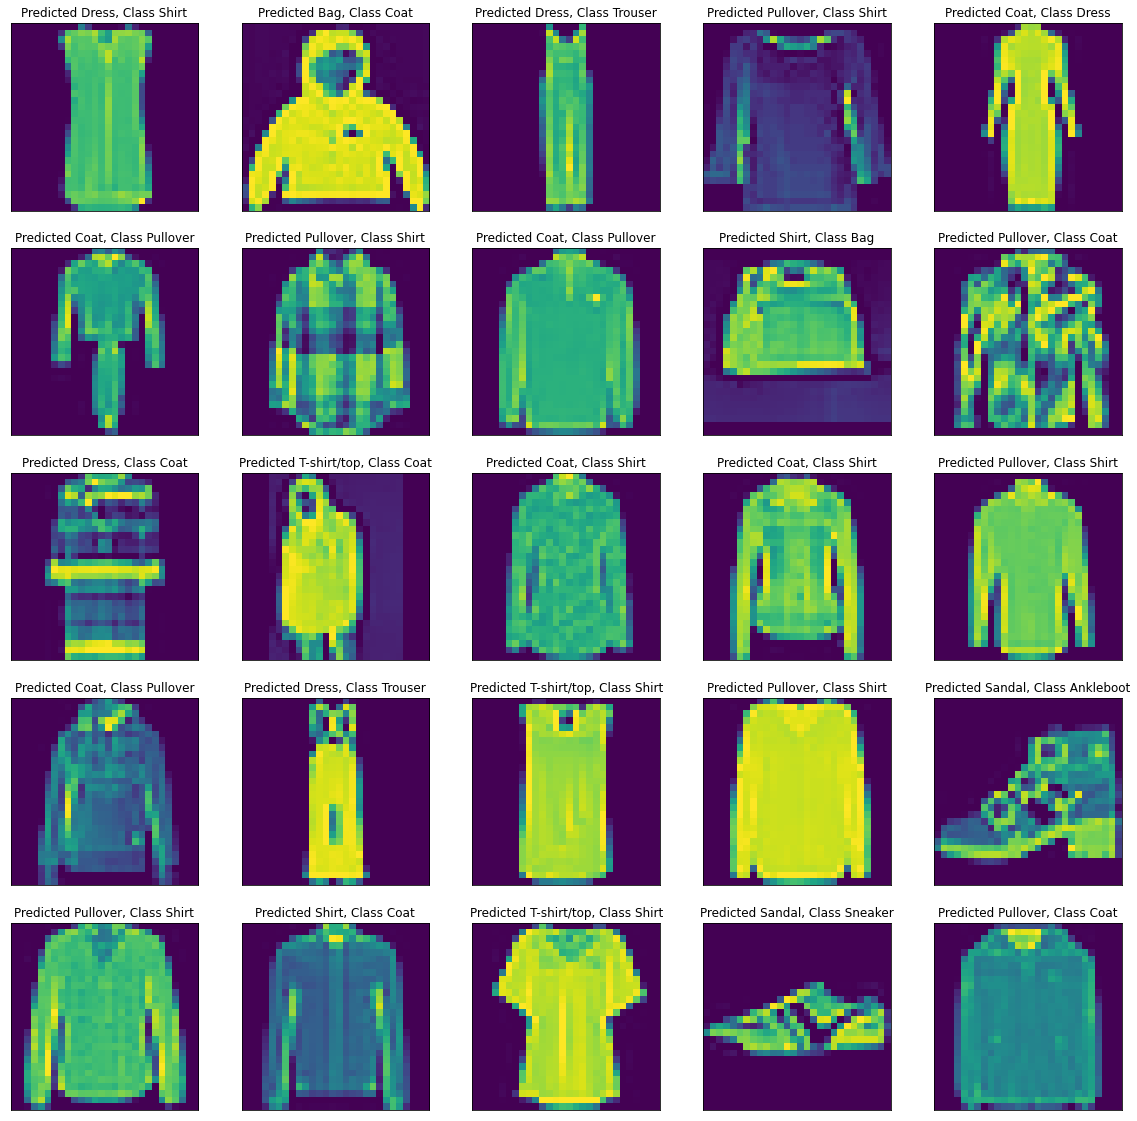

In [38]:
plt.figure(figsize=(20, 20))
for i, w in enumerate(wrong_index[:25]):
    plt.subplot(5,5,i+1)
    plt.xticks([]) # this not to show pixels on axes
    plt.yticks([]) # this not to show pixels on axes
    plt.imshow(Z_test.loc[w].values.reshape((28,28)) )
    plt.title(f"Predicted {wrong['pred'].iloc[i]}, Class {wrong['true'].iloc[i]}")
plt.show();